## Importing the necessary library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 # open-cv used for image processing
%matplotlib inline
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import tensorflow_hub as hub
import keras.utils as image
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report


## Directory assignment

In [2]:
train_dir = "C:\\Users\\ALLAN DRACO\\Downloads\\PROJECT\\train"
test_dir = "C:\\Users\\ALLAN DRACO\\Downloads\\PROJECT\\test"

## Reading the first image

In [3]:
image = cv2.imread(r"C:\\Users\\ALLAN DRACO\\Downloads\\PROJECT\\train\\1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB

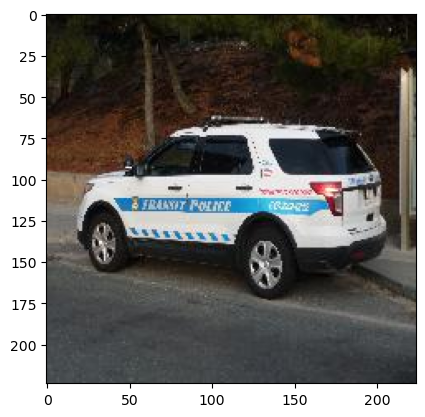

In [4]:
plt.imshow(image)

In [5]:
image.shape # This shows the shape of the image (length, width,chanel)

(224, 224, 3)

## Preprocessing

For preprocessing, the ImageDataGenerator is used. It is used for the generation of batches containing the data of tensor images and is
used in the domain of real-time data augmentation.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Keras image data generator is used for the generation

In [7]:
# Here we are applying our desired transformations
image_gen = ImageDataGenerator(
            rotation_range=20,# specifies the rotation to be 20%
            width_shift_range=0.1, # specifies the width shift of 10%
            height_shift_range=0.1,# specifies the height shift of 10%
            shear_range=0.20, # crops part of the image
            zoom_range=0.20, # #zooms the image by 20%
            fill_mode='nearest', # fills using the nearest pixel
            horizontal_flip=True, # Secifies the horizontal flip
            rescale=1/255 # scales the image
)


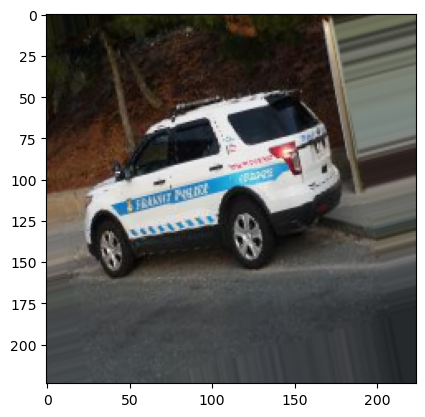

In [8]:
# showing the transformation
plt.imshow(image_gen.random_transform(image))

In [9]:
train_df=pd.read_csv("C:\\Users\\ALLAN DRACO\\Downloads\\PROJECT\\train.csv")
test_df=pd.read_csv("C:\\Users\\ALLAN DRACO\\Downloads\\PROJECT\\test.csv")

In [10]:
test_df

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg
...,...
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg


In [11]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [12]:
# Check if 'emergency_or_not' column exists before converting its values to string type
if 'emergency_or_not' in train_df.columns:
    train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

if 'emergency_or_not' in test_df.columns:
    test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [14]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50# defines the batch size
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50 # defines the batch size
 ) 


Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


## Constructor stage

In [15]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilation stage


In [16]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │       1,081,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,101,221 (4.20 MB)

 Trainable params: 1,101,157 (4.20 MB)

 Non-trainable params: 64 (256.00 B)

## Training stage

In [18]:
history=model.fit(train_generator,epochs = 30,validation_data = validation_generator)

Epoch 1/30


E:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.5744 - loss: 0.8199 - val_accuracy: 0.6492 - val_loss: 0.6627
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.7029 - loss: 0.6049 - val_accuracy: 0.6069 - val_loss: 0.6534
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.7471 - loss: 0.5152 - val_accuracy: 0.6069 - val_loss: 0.6629
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7395 - loss: 0.5328 - val_accuracy: 0.6109 - val_loss: 0.6571
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7801 - loss: 0.4748 - val_accuracy: 0.6089 - val_loss: 0.6430
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7871 - loss: 0.4638 - val_accuracy: 0.6230 - val_loss: 0.6305
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.7938 - loss: 0.4744 - val_accuracy: 0.6431 - val_loss: 0.6159
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8087 - loss: 0.4050 - val_accuracy: 0.6190 - val_loss: 0.6091
Epo

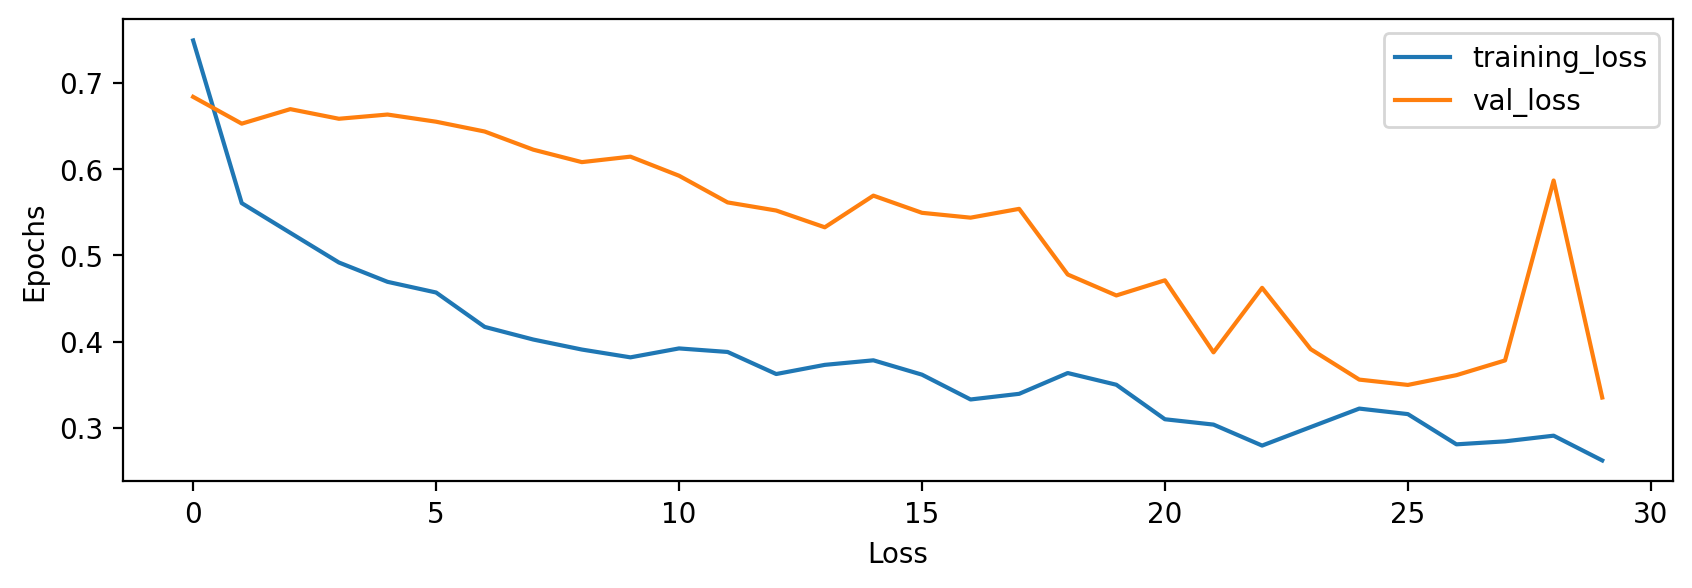

In [33]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

## Evaluation stage

In [34]:
test_df.index

RangeIndex(start=0, stop=706, step=1)

In [36]:
test_dir_image = []
for i in tqdm(test_df.index):
    img_path = r'C:\Users\ALLAN DRACO\Downloads\PROJECT\test\\' + test_df['image_names'][i] # Adjust the path to match the directory structure
    img = Image.open(img_path).convert('RGB')  # Load image using PIL
    img = img.resize((224, 224))  # Resize image
    img = np.array(img)  # Convert image to NumPy array
#     img = img / 255.0  # Normalize pixel values
    test_dir_image.append(img)

test = np.array(test_dir_image)


100%|████████████████████████████████████████████████████████████████████████████████| 706/706 [00:08<00:00, 87.81it/s]


In [37]:
pred = model.predict(test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step


In [38]:
num_ = np.floor(pred)

In [39]:
submission = pd.read_csv('C:/Users/ALLAN DRACO/Downloads/PROJECT/sample_submission.csv')
submission['emergency_or_not'] = num_

In [40]:
submission.to_csv('submission29.csv', index = False)

In [41]:
submission.head(5)

,image_names,emergency_or_not
0,1960.jpg,0.0
1,668.jpg,1.0
2,2082.jpg,0.0
3,808.jpg,1.0
4,1907.jpg,0.0


In [44]:
from tensorflow.keras.models import load_model
# Load the model
model_vehicle = load_model('vehicle.keras', custom_objects={'KerasLayer': hub.KerasLayer})

# Compile with a new optimizer if necessary
model_vehicle.compile(optimizer='adam', loss='your_loss_function', metrics=['accuracy'])

